In [ ]:
#import librarys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

GRAPHING and OPENING a FITS file (spec)

In [155]:
file = fits.open('v612sct_20210614.dat (1).fits')

In [156]:
file[0].header
#primary, FITS header consists of a keyword name, a value, and optionally a comme

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3 / Number of axes                                 
NAXIS1  =                 2626 / Axis length                                    
NAXIS2  =                    1 / Axis length                                    
NAXIS3  =                    4 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2021-06-27T06:21:21' / Date FITS file was generated                  
IRAF-TLM= '2021-06-27T06:21:21' / Time of last modification                     
OBJECT  = 'V612 Sct'           / Name of the object observed                    
OBSERVAT= 'MMTO              '  /  observatory                                  
OBSERVER= 'WoodwardCE, Wagne

Filename: v612sct_20210614.dat (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (2626, 1, 4)   float32   


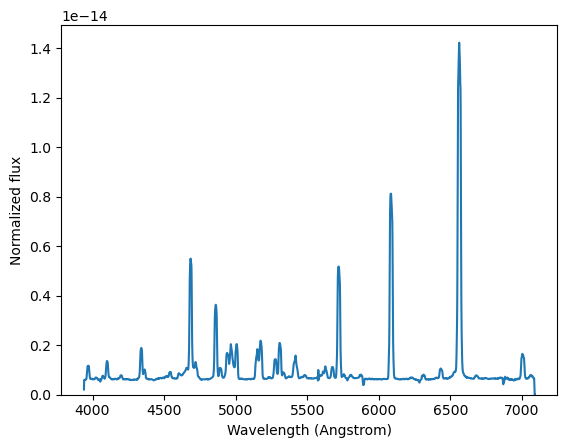

<Figure size 640x480 with 0 Axes>

In [157]:
# https://astronomy.stackexchange.com/questions/43552/working-with-stellar-spectra-in-fits-format-in-python
#How to know how to plot the flux NAXIS3 = 4, which indicates that there are four layers along the third axis. 
#flux data would likely be stored in the first layer of the first axis (since there's only one pixel along the second axis)
filelink = 'v612sct_20210614.dat (1).fits'
with fits.open(filelink) as file:
    file.info()
    data = file[0].data
    hdr = file[0].header
    obj_name = hdr.get('OBJECT', 'Unknown')
    flux = data[0, 0]  # Assuming flux data is in the first layer of the first axis, this will access the first layer
    w = WCS(hdr, naxis=1, relax=False, fix=False)
    lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
    plt.plot(lam, flux)
    plt.ylim(0,) # This sets the lower limit to 0(y-axis)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Normalized flux')
    plt.show()

    plt.savefig(obj_name + '.png')


IDENTIFYING HYDROGEN LINES (annontating the graph)

Filename: v612sct_20210614.dat (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (2626, 1, 4)   float32   


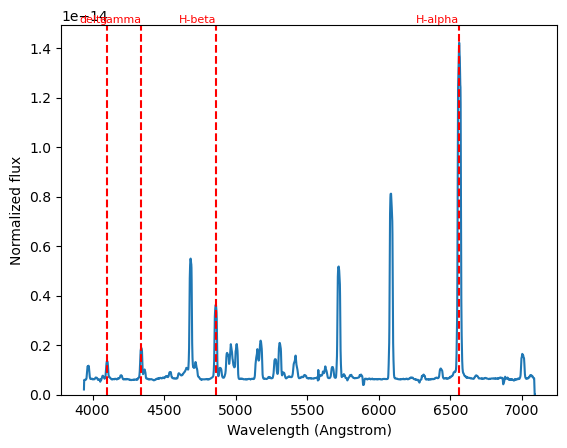

In [170]:
filelink = 'v612sct_20210614.dat (1).fits'
with fits.open(filelink) as file:
    file.info()
    data = file[0].data
    hdr = file[0].header
    obj_name = hdr.get('OBJECT', 'Unknown')
    flux = data[0, 0]  # Assuming flux data is in the first layer of the first axis, this will access the first layer
    w = WCS(hdr, naxis=1, relax=False, fix=False)
    lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
    plt.plot(lam, flux)
    plt.ylim(0,) # This sets the lower limit to 0(y-axis)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Normalized flux')
    
    
#balmer lines(visible spectrum of the hydrogen atom)
#  These are dictionary methods and their keys
    hydrogen_lines = {
        'H-alpha': 6563,
        'H-beta': 4861,
        'gamma': 4340,
        'delta': 4102
    }
# creating the lines
# a loop that iterates over each key-value pair in the hydrogen_lines dictionary using the items() method
    for line_name, line_wavelength in hydrogen_lines.items():
        plt.axvline(x=line_wavelength, color='r', linestyle='--')  # Add vertical dashed line
        plt.text(line_wavelength, plt.ylim()[1], line_name, fontsize=8, va='bottom', ha='right', color='r')  # Add text annotation
    plt.show()
    file.close()

ZOOMING in a particular region (H-alpha) by adjusting the limits of the x-axis

Filename: v612sct_20210614.dat (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (2626, 1, 4)   float32   


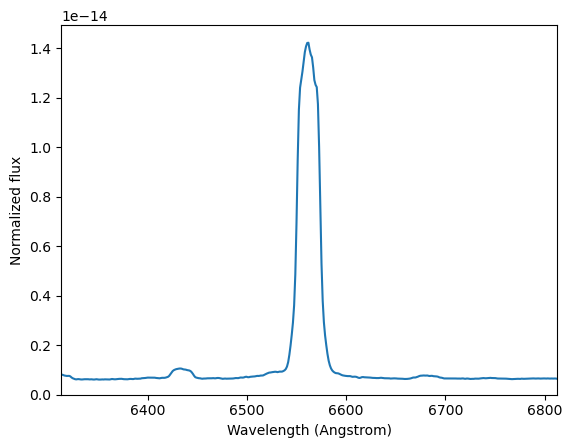

In [171]:
filelink = 'v612sct_20210614.dat (1).fits'
with fits.open(filelink) as file:
    file.info()
    data = file[0].data
    hdr = file[0].header
    obj_name = hdr.get('OBJECT', 'Unknown')
    flux = data[0, 0]  # Assuming flux data is in the first layer of the first axis, this will access the first layer
    w = WCS(hdr, naxis=1, relax=False, fix=False)
    lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]
    plt.plot(lam, flux)
    plt.ylim(0,) # This sets the lower limit to 0(y-axis)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Normalized flux')
    
    
#balmer lines(visible spectrum of the hydrogen atom)
#  These are dictionary methods and their keys
    hydrogen_lines = {
        'H-alpha': 6563,
        'H-beta': 4861,
        'H-gamma': 4340,
        'H-delta': 4102
    }


    h_alpha = 6563  # Wavelength of H-alpha line
    zoom_width = 500  # Width of the zoomed-in region around the H-alpha line
    zoom = (h_alpha - zoom_width / 2, h_alpha + zoom_width / 2) #start and end of zoomed in region
    plt.xlim(zoom) 
    plt.show()
    file.close()

In [146]:
print(min(lam), max(lam))

3940.0 7090.0


Where function

In [147]:
# file.info Shows you the info of the specific file

In [148]:
#extract image data which is in the primary
# data = file[0].data #data is now stored as a 2D numpy array
# print(data.shape)
# data

#Ignore this for now

In [149]:
# file.info()
# hdr = file[0].header
# data = file[0].data
# flux = data[0]
# obj_name = hdr.get('OBJECT', 'Unknown')
# w = WCS(hdr, naxis=1, relax=False, fix=False)
# lam = w.wcs_pix2world(np.arange(len(flux)), 0)[0]


# print("Min flux:", np.min(flux)) just showed me the data of the fluxes 
# print("Max flux:", np.max(flux)) 
# plt.plot(lam, flux)
# plt.ylim(0, )
# plt.xlabel('Wavelength (Angstrom)')
# plt.ylabel('Normalized flux')
# plt.show()
# plt.savefig(obj_name + '.png')
# file.close()

#Past Code, and why it was wrong
#for the flux data[0, 0] typically refers to a single data point at a specific spatial position and spectral channel
#data[0] refers to all the data at a specific spectral channel across all spatial positions.

# from astropy.wcs import WCS
# wcs = WCS(file[0].header)
# plt.imshow(data.data)
# plotting wavelength and flux
# you need to get the